# Quick start
This section is a quick start guide that will show the basic functionality of McStasScript. It assumes the user is already familiar with McStas itself, if this is not the case, it is recommended to start with the tutorial which can serve as an introduction to both McStas and McStasScript.

## Importing the package
The package includes an interface folder that contains the modules which the  user is meant to use directly.

In [1]:
from mcstasscript.interface import instr, functions, plotter

## Creating the first instrument object
Now the package can be used. Start with creating a new instrument, just needs a name. For a McXtrace instrument use McXtrace_instr instead.

In [2]:
instrument = instr.McStas_instr("first_instrument")

### Finding a component
The instrument object loads the available McStas components, so it can show these in order to help the user.

In [3]:
instrument.show_components()

Here are the available component categories:
 contrib
 misc
 monitors
 obsolete
 optics
 samples
 sources
 union
Call show_components(category_name) to display


In [4]:
instrument.show_components("sources")

Here are all components in the sources category.
 Adapt_check     Moderator           Source_Optimizer   Source_gen
 ESS_butterfly   Monitor_Optimizer   Source_adapt       Source_simple
 ESS_moderator   Source_Maxwell_3    Source_div         


### Adding the first component
McStas components can be added to the instrument, here we add a source and ask for help on the parameters.

In [5]:
source = instrument.add_component("source", "Source_simple")
source.show_parameters()

 ___ Help Source_simple _____________________________________________________________
|optional parameter|required parameter|default value|user specified value|
radius = 0.1 [m] // Radius of circle in (x,y,0) plane where neutrons are 
                    generated. 
yheight = 0.0 [m] // Height of rectangle in (x,y,0) plane where neutrons are 
                     generated. 
xwidth = 0.0 [m] // Width of rectangle in (x,y,0) plane where neutrons are 
                    generated. 
dist = 0.0 [m] // Distance to target along z axis.
focus_xw = 0.045 [m] // Width of target
focus_yh = 0.12 [m] // Height of target
E0 = 0.0 [meV] // Mean energy of neutrons.
dE = 0.0 [meV] // Energy half spread of neutrons (flat or gaussian sigma).
lambda0 = 0.0 [AA] // Mean wavelength of neutrons.
dlambda = 0.0 [AA] // Wavelength half spread of neutrons.
flux = 1.0 [1/(s*cm**2*st*energy unit)] // flux per energy unit, Angs or meV if 
                                           flux=0, the source emits 1 in 4*

### Set parameters
The parameters of the component object are adjustable directly through the attributes of the object.

In [6]:
source.xwidth = 0.03
source.yheight = 0.03
source.lambda0 = 3
source.dlambda = 2.2
source.dist = 5
source.focus_xw = 0.01
source.focus_yh = 0.01
print(source)

COMPONENT source = Source_simple
  yheight = 0.03 [m]
  xwidth = 0.03 [m]
  dist = 5 [m]
  focus_xw = 0.01 [m]
  focus_yh = 0.01 [m]
  lambda0 = 3 [AA]
  dlambda = 2.2 [AA]
AT [0, 0, 0] ABSOLUTE


### Instrument parameters
It is possible to add instrument parameters that can be adjusted when running the simulation or adjusted using the widget interface.

In [7]:
wavelength = instrument.add_parameter("wavelength", value=3, comment="Wavelength in AA")
source.lambda0 = wavelength
source.dlambda = "0.1*wavelength"
print(source)

COMPONENT source = Source_simple
  yheight = 0.03 [m]
  xwidth = 0.03 [m]
  dist = 5 [m]
  focus_xw = 0.01 [m]
  focus_yh = 0.01 [m]
  lambda0 = wavelength [AA]
  dlambda = 0.1*wavelength [AA]
AT [0, 0, 0] ABSOLUTE


### Inserting a sample component
A sample component is added as any other component, but here we place it relative to the source. A SANS sample is used, it focuses to a detector (chosen with target_index) with a width of focus_xw and height of focus_yh.

In [8]:
sample = instrument.add_component("sans_sample", "Sans_spheres")

In [9]:
sample.set_AT(5, RELATIVE=source)
sample.set_parameters(R=120, xwidth=0.01, yheight=0.01, zdepth=0.01,
                      target_index=1, focus_xw=0.5, focus_yh=0.5)
print(sample)

COMPONENT sans_sample = Sans_spheres
  R = 120 [AA]
  xwidth = 0.01 [m]
  yheight = 0.01 [m]
  zdepth = 0.01 [m]
  target_index = 1 [1]
  focus_xw = 0.5 [m]
  focus_yh = 0.5 [m]
AT [0, 0, 3] RELATIVE source


### Adding a monitor
The monitor can be placed relative to the sample, and even use the attributes from the sample to define its size so that the two always match. When setting a filename, it has to be a string also in the generated code, so use double quotation marks as shown here.

In [10]:
PSD = instrument.add_component("PSD", "PSD_monitor")
PSD.set_AT([0, 0, 5], RELATIVE=sample)
PSD.set_parameters(xwidth=sample.focus_xw, yheight=sample.focus_yh, filename='"PSD.dat"')

## Setting up the simulation
The instrument now contains a source, a sample and a monitor, this is enough for a simple demonstration.

In [11]:
instrument.show_parameters()

 wavelength  = 3  // Wavelength in AA


In [12]:
instrument.set_parameters(wavelength=4)
instrument.settings(ncount=2E6)

### Performing the simulation
In order to start the simulation the *backengine* method is called. If the simulation is successful, the data will be placed in the *data* attribute, otherwise this attribute will contain None.

In [13]:
instrument.backengine()

INFO: Using directory: "/Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/docs/source/getting_started/first_instrument_data_4"
INFO: Regenerating c-file: first_instrument.c
CFLAGS=
INFO: Recompiling: ./first_instrument.out
mccode-r.c:2837:3: warning: expression result unused [-Wunused-value]
  *t0;
  ^~~
1 warning generated.
INFO: ===
INFO: Placing instr file copy first_instrument.instr in dataset /Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/docs/source/getting_started/first_instrument_data_4

Detector: PSD_I=1.13331e-05 PSD_ERR=1.27748e-08 PSD_N=1.99997e+06 "PSD.dat"
loading system configuration



In [14]:
data = instrument.data

## Plot the data
The data can be plotted with the *make_sub_plot* function from the plotter module.

Plotting data with name PSD


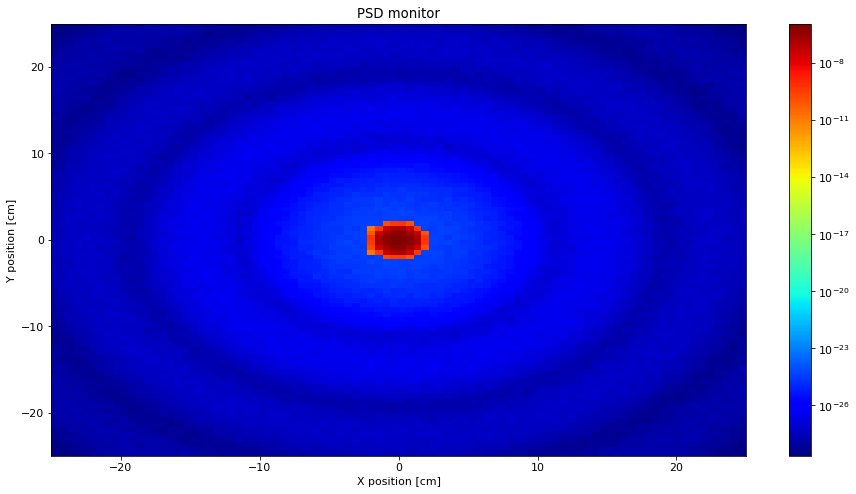

In [15]:
plotter.make_sub_plot(data, log=True)

### Access the data
The data is a list of McStasData objects and can be accessed directly.

In [16]:
print(data)

[
McStasData: PSD type: 2D  I:1.13331e-05 E:1.27748e-08 N:1.99997e+06]


It is possible to search through the data list with the *name_search* function to retrieve the desired data object. 

In [17]:
PSD_data = functions.name_search("PSD", data)

The intensities can then be accessed directly, along with Error and Ncount. 

In [18]:
PSD_data.Intensity

array([[3.44527442e-29, 2.85790145e-29, 3.31769558e-29, ...,
        2.91848858e-29, 3.46035438e-29, 3.18800919e-29],
       [2.99309240e-29, 2.71389219e-29, 4.51518249e-29, ...,
        3.88940177e-29, 2.79711427e-29, 3.13858152e-29],
       [3.09932004e-29, 3.65012990e-29, 4.19605051e-29, ...,
        6.17328696e-29, 4.54832798e-29, 2.95402503e-29],
       ...,
       [2.26834139e-29, 3.81964364e-29, 5.66352294e-29, ...,
        6.09311571e-29, 4.78664320e-29, 3.58314124e-29],
       [3.37192383e-29, 2.95154846e-29, 3.68253460e-29, ...,
        4.11785300e-29, 3.48591918e-29, 2.20162822e-29],
       [2.39943987e-29, 2.44856071e-29, 2.61788386e-29, ...,
        3.09847097e-29, 2.78252273e-29, 2.38869215e-29]])

Metadata is also available as a dict.

In [19]:
info_dict = PSD_data.metadata.info
for field, info in info_dict.items():
    print(field, ":", info)

Date : Tue Jan 11 12:39:32 2022 (1641901172)
type : array_2d(90, 90)
Source : first_instrument (first_instrument.instr)
component : PSD
position : 0 0 8
title : PSD monitor
Ncount : 2000000
filename : PSD.dat
statistics : X0=0.000187759; dX=0.61402; Y0=0.00177741; dY=0.612948;
signal : Min=2.20163e-29; Max=1.15483e-06; Mean=1.39915e-09;
values : 1.13331e-05 1.27748e-08 1.99997e+06
xvar : X
yvar : Y
xlabel : X position [cm]
ylabel : Y position [cm]
zvar : I
zlabel : Signal per bin
xylimits : -25 25 -25 25
variables : I I_err N
Parameters : {'wavelength': 4.0}
